<a href="https://colab.research.google.com/github/ArmanZaki/Week-2/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution:
Water_Quality_Class
Poor        908
Moderate    417
Good        230
Name: count, dtype: int64

🔹 Logistic Regression Results:
              precision    recall  f1-score   support

        Good       0.70      0.30      0.42        46
    Moderate       0.55      0.65      0.60        83
        Poor       0.87      0.92      0.89       182

    accuracy                           0.76       311
   macro avg       0.71      0.62      0.64       311
weighted avg       0.76      0.76      0.74       311


🔹 Random Forest Results:
              precision    recall  f1-score   support

        Good       1.00      0.98      0.99        46
    Moderate       0.97      1.00      0.98        83
        Poor       1.00      0.99      0.99       182

    accuracy                           0.99       311
   macro avg       0.99      0.99      0.99       311
weighted avg       0.99      0.99      0.99       311



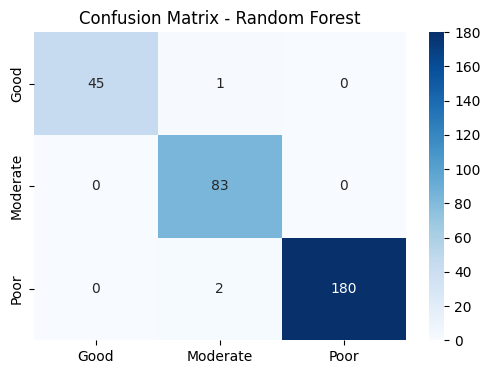

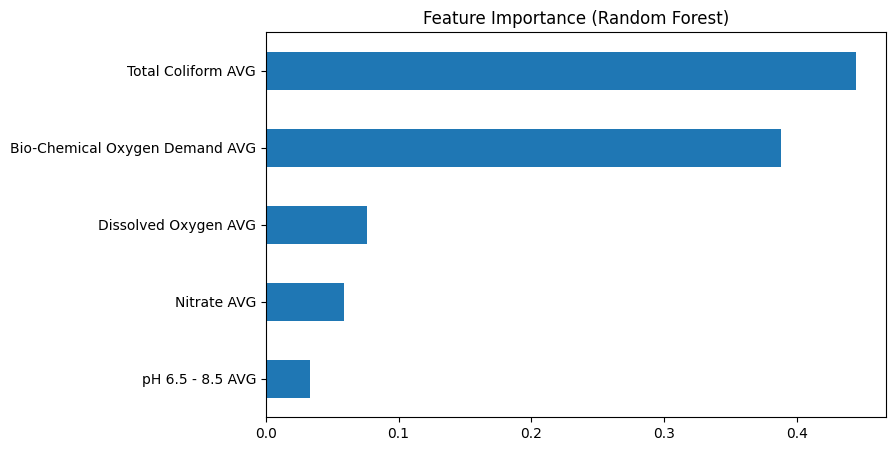

In [12]:
# ====================================================
# STEP 1: Load Clean Data
# ====================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("/content/cleaned_data (2).csv")

# ====================================================
# STEP 2: Define Water Quality Labels (CPCB thresholds)
# ====================================================
def classify_quality(row):
    if (row["Dissolved Oxygen AVG"] >= 6) and (row["Bio-Chemical Oxygen Demand AVG"] <= 2) \
       and (6.5 <= row["pH 6.5 - 8.5 AVG"] <= 8.5) and (row["Total Coliform AVG"] <= 500):
        return "Good"
    elif (row["Dissolved Oxygen AVG"] >= 4) and (row["Bio-Chemical Oxygen Demand AVG"] <= 3) \
         and (6.0 <= row["pH 6.5 - 8.5 AVG"] <= 9.0) and (row["Total Coliform AVG"] <= 2500):
        return "Moderate"
    else:
        return "Poor"

df["Water_Quality_Class"] = df.apply(classify_quality, axis=1)

print("Class distribution:")
print(df["Water_Quality_Class"].value_counts())

# ====================================================
# STEP 3: Select Features & Target
# ====================================================
features = [
    "Dissolved Oxygen AVG",
    "Bio-Chemical Oxygen Demand AVG",
    "pH 6.5 - 8.5 AVG",
    "Nitrate AVG",
    "Total Coliform AVG"
]

X = df[features]
y = df["Water_Quality_Class"]

# ====================================================
# STEP 4: Handle Missing Values (Imputation)
# ====================================================
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ====================================================
# STEP 5: Train-Test Split
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ====================================================
# STEP 6: Train Models
# ====================================================

# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ====================================================
# STEP 7: Evaluation
# ====================================================

print("\n🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

print("\n🔹 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance (Random Forest)
feat_imp = pd.Series(rf.feature_importances_, index=features)
feat_imp.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance (Random Forest)")
plt.show()
